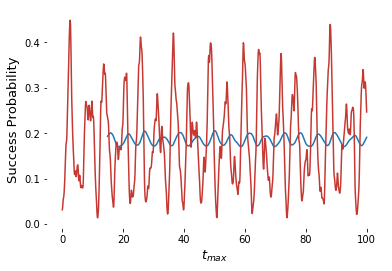

[0.03125]
[0.03332085]
[0.03549104]
[0.03775992]
[0.04012631]
[0.04258849]
[0.04514419]
[0.04779063]
[0.05052452]
[0.05334211]
[0.05623923]
[0.05921128]
[0.06225335]
[0.06536022]
[0.06852641]
[0.07174623]
[0.07501385]
[0.07832326]
[0.08166843]
[0.08504321]
[0.08844144]
[0.09185698]
[0.09528366]
[0.09871535]
[0.10214596]
[0.10556946]
[0.10897985]
[0.11237122]
[0.11573771]
[0.11907355]
[0.12237304]
[0.12563058]
[0.12884067]
[0.13199793]
[0.1350971]
[0.13813305]


In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import pandas as pd
from scipy.linalg import eig
np.set_printoptions(threshold=sys.maxsize)

'''M = ([[0,1,0],
     [0,0,1],
     [0,0,0]])'''
M = ([[0,1,1,0,0],
       [0,0,1,0,1],
       [0,0,0,1,1],
       [0,0,0,0,0],
       [0,0,0,0,0]])

J_capital = np.array(M)
h = []
kappa = float(0.5)


def h_calc():
    rows = (np.shape(J_capital)[0])
    columns = (np.shape(J_capital)[1])
    for k in range(rows):
        total = 0
        for j in range(columns):
            x = -1*(M[k][j]+M[j][k])
            total = total + x
        h.append([total+kappa])
    return 

h_calc()

#print(h)
def sigma_z_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_z = [[1,0],
              [0,-1]]
    first_set = np.kron(I_1,sigma_z) 
    #print(first_set)
    return (np.kron(first_set , I_2))

#print(np.array(sigma_z_j(8,2)))
#print(sigma_z_j(8,2))

def sigma_x_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_x = [[0,1],
              [1,0]]
    first_set = np.kron(I_1,sigma_x) 
    #print(first_set)
    return (np.kron(first_set , I_2))


def H_ising1(n):
    J_rows = (np.shape(J_capital)[0])
    J_columns = (np.shape(J_capital)[1])
    #print (J_rows)
    x = np.zeros((2**n,2**n))
    for i in range (J_rows):
        for j in range(i+1,J_columns):
            x = J_capital[i][j]*np.array(sigma_z_j(n,i+1))*np.array(sigma_z_j(n,j+1)) + x
            #print(x)
    return x
                     
def H_ising2(n):
    h_rows = (np.shape(h)[0])
    #print(h_rows)
    y = np.zeros((2**n,2**n))
    #print(y)
    for i in range (h_rows):
        #print(h[j][0])
        #print('Sigma _z_ j of',(j+1),'is\n', sigma_z_j(3,j+1))
        #print(np.array([sigma_z_j(3,j)]))
        y = h[i][0]*np.array(sigma_z_j(n,i+1)) + y
        #print('H_j * Sigma_z_j is\n',y)   
    return y

def total_H(n):
    return H_ising1(n)+H_ising2(n)

def normalised_H_ground(n):
    norm = np.linalg.norm(total_H(n)[19])
    return total_H(n)[19]/norm
    

def min_ValuePos(n):
    return np.where(total_H(n) == np.min(total_H(n)))

def min_Value(n):
    array = normalised_H(n)
    return normalised_H(n)[19][19]

def ground_state(n):
    bit_flip = 1/(np.sqrt(2))*np.array([[1],
                                  [1]])
    first = bit_flip
    for i in range(n-1):
        first = np.kron(first,bit_flip)
    return first

def H_QW(n,gamma):
    first_term = np.zeros((2**n,2**n))
    
    for j in range(n):
        first_term = np.array(sigma_x_j(n,j+1)) + first_term
    total = -gamma*first_term 
    return total
    
def H_QW_total(n,gamma):
    return H_QW(n,gamma) +  total_H(n)

def normalised_QW(n,gamma):
    norm = np.linalg.norm(H_QW_total(n,gamma))
    return H_QW_total(n,gamma)/norm
  

def QW_TE(n,t_max,gamma):
    plt.tick_params(axis='both',colors='black')
    plt.style.use("ggplot")
    plt.rcParams['axes.edgecolor'] = "#777777"
    plt.rcParams['axes.facecolor'] = '#FFFFFF'
    x_axis = []
    y_axis = []
    test_y = []
    time_averaged = []
    i = 1j
    time = 0
    dt = 0.1
    c = 0
    test_x = []
    
    '''while (time/t_max)<5:
        x_axis.append(time/t_max)
        exponent_term = expm(i*H_QW(n)*time)
        time += 0.1
        z = np.dot(exponent_term,ground_state(n))
        y_axis.append(np.abs(z[19]**2))'''
        
    while time<100:
        x_axis.append(time)
        exponent_term = expm(i*H_QW_total(n,gamma)*time)
        time += 0.1
        z = np.dot(exponent_term,ground_state(n))
        y_axis.append(np.abs(z[19]**2))  

    window_size = 150
    numbers_series = pd.Series(y_axis)
    windows = numbers_series.rolling(window_size)
    moving_averages = windows.mean()
    moving_averages_list = moving_averages.tolist()
    without_nans = moving_averages_list[window_size - 1:] 
    
    
    #print(x_axis)
    #print(without_nans)
    
  
    graph1 = plt.plot(x_axis[(window_size - 1):],without_nans, label = 'Running Average')
    graph2 = plt.plot(x_axis,y_axis, color = '#C53932', label = "Instantaneous")
    plt.xlabel(r'${t_{max}}$', fontsize=13, color ='black')
    plt.ylabel("Success Probability", fontsize=13, color = 'black')
    axis = plt.gca()
    plt.savefig('QW_RuntimeBlack.pdf', dpi=100, bbox_inches = 'tight')
    plt.show()

QW_TE(5,100,0.67)
#average(5,100,0.67)

def average(n,t_max,gamma):
    
    first_sum = 0
    second_sum = 0
    p_inf = 0
    
    E_gamma = eig(H_QW_total(n,gamma))
  
    eigenvector_gamma = E_gamma[1]
    
    total_eigen = np.shape(eigenvector_gamma)[0]

    for i in range(total_eigen): 
        first_sum = np.abs(np.dot(eigenvector_gamma[:,i],ground_state(n)))**2 #same as np.inner 
        #print(first_sum)
        second_sum = np.abs(np.dot(normalised_H_ground(n),eigenvector_gamma[:,i]))**2
        p_inf += first_sum * second_sum
        #print('total is', (total_sum))'''

        
    print(p_inf)
    return p_inf
    #print(sum(test))
    #print('E eigenvaues are', E_gamma[0])
    #print('E eigenvectors are', E_gamma[1])
    #print(ground_state(n))
    #print(eigenvector_gamma[0][1]
    #print(eigenvector_gamma[0])
    #print(total_eigen)
    #print(np.shape(eigenvector_gamma[0]))
    #print(np.shape(ground_state(n)))
    #print(np.shape(normalised_H_ground(n)))
    #print(E_0[1])
    #print(eigenvector)

def Optimal_gamma(n, t_max, gamma):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    gamma = 0 
    x_axis = []
    y_axis = []
        
    while gamma < 2:
        x_axis.append(gamma)
        y_axis.append(average(n,t_max,gamma))
        gamma += 0.01

    print(np.where(y_axis == np.max(y_axis)))
    print(x_axis[67])
    print(x_axis[66])
    plt.plot(x_axis,y_axis)
    plt.xlabel(r'$\gamma$', fontsize=12)
    plt.ylabel("Success Probability", fontsize=13)

    plt.savefig('GammaBlack.pdf', dpi=100, bbox_inches = 'tight')
    plt.show

Optimal_gamma(5,100,0)

In [207]:
yes = [[-4.38165695e-05,  2.12584627e-04, -1.02859927e-03,  1.33705909e-01,
  -2.61413482e-16,  3.09069512e-03, -5.58229554e-03,  2.18771367e-01,
  -3.36265899e-16, -2.52579433e-01, -1.67758164e-01, -2.08207022e-01,
  -1.77548869e-02, -1.31114399e-01,  3.63860110e-01, -2.92609687e-01,
  -9.36797724e-03, -2.98792044e-02, -1.06575131e-02,  1.82746982e-02,
   2.40764700e-15, -6.36053074e-01 , 1.60898502e-01, -2.62401629e-01,
   1.82130129e-01, -1.36142323e-02, -1.71226675e-01,  5.83494136e-16,
  -5.02784012e-16, -6.69019862e-16, -1.50654188e-15, -2.08785794e-15]]

no = [[0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767],
 [0.1767767]]

print(np.shape(yes))
print(np.shape(no))

print(np.dot(yes,no)**2)

(1, 32)
(32, 1)
[[0.03982792]]


In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import pandas as pd
from scipy.integrate import simps
from scipy.linalg import eig
np.set_printoptions(threshold=4)

'''M = ([[0,1,0],
     [0,0,1],
     [0,0,0]])'''
M = ([[0,1,1,0,0],
       [0,0,1,0,1],
       [0,0,0,1,1],
       [0,0,0,0,0],
       [0,0,0,0,0]])

J_capital = np.array(M)
h = []
kappa = float(0.5)


def h_calc():
    rows = (np.shape(J_capital)[0])
    columns = (np.shape(J_capital)[1])
    for k in range(rows):
        total = 0
        for j in range(columns):
            x = -1*(M[k][j]+M[j][k])
            total = total + x
        h.append([total+kappa])
    return 

h_calc()

#print(h)
def sigma_z_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_z = [[1,0],
              [0,-1]]
    first_set = np.kron(I_1,sigma_z) 
    #print(first_set)
    return (np.kron(first_set , I_2))

#print(np.array(sigma_z_j(8,2)))
#print(sigma_z_j(8,2))

def sigma_x_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_x = [[0,1],
              [1,0]]
    first_set = np.kron(I_1,sigma_x) 
    #print(first_set)
    return (np.kron(first_set , I_2))


def H_ising1(n):
    J_rows = (np.shape(J_capital)[0])
    J_columns = (np.shape(J_capital)[1])
    #print (J_rows)
    x = np.zeros((2**n,2**n))
    for i in range (J_rows):
        for j in range(i+1,J_columns):
            x = J_capital[i][j]*np.array(sigma_z_j(n,i+1))*np.array(sigma_z_j(n,j+1)) + x
            #print(x)
    return x
                     
def H_ising2(n):
    h_rows = (np.shape(h)[0])
    #print(h_rows)
    y = np.zeros((2**n,2**n))
    #print(y)
    for i in range (h_rows):
        #print(h[j][0])
        #print('Sigma _z_ j of',(j+1),'is\n', sigma_z_j(3,j+1))
        #print(np.array([sigma_z_j(3,j)]))
        y = h[i][0]*np.array(sigma_z_j(n,i+1)) + y
        #print('H_j * Sigma_z_j is\n',y)   
    return y

def total_H(n):
    return H_ising1(n)+H_ising2(n)

def min_Value(n):
    return np.where(total_H(n) == np.min(total_H(n)))

def ground_state(n):
    bit_flip = 1/(np.sqrt(2))*np.array([[1],
                                  [1]])
    first = bit_flip
    for i in range(n-1):
        first = np.kron(first,bit_flip)
    return first

def H_QW(n,gamma):
    first_term = np.zeros((2**n,2**n))
    
    for j in range(n):
        first_term = np.array(sigma_x_j(n,j+1)) + first_term
    total = -gamma*first_term + total_H(n)
    return total
    
def QW_TE(n,t_max,gamma):
    x_axis = []
    y_axis = []
    test_y = []
    time_averaged = []
    i = 1j
    time = 0
    dt = 0.1
    c = 0
    test_x = []
    
    '''while (time/t_max)<5:
        x_axis.append(time/t_max)
        exponent_term = expm(i*H_QW(n)*time)
        time += 0.1
        z = np.dot(exponent_term,ground_state(n))
        y_axis.append(np.abs(z[19]**2))'''
        
    while time<50:
        x_axis.append(time)
        exponent_term = expm(i*H_QW(n,gamma)*time)
        time += 1
        z = np.dot(exponent_term,ground_state(n))
        y_axis.append(np.abs(z[19]**2))  
    
    y = np.asarray(y_axis).squeeze()
    z = y.tolist()
    f = sum(z)/50
    return f

def average(n,t_max,gamma):
    first_sum = 0
    second_sum = 0
    p_inf = 0
    
    E_gamma = eig(H_QW_total(n,gamma))
        
    eigenvector_gamma = E_gamma[1]
    
    total_eigen = np.shape(eigenvector_gamma)[0]
    
    #print('E_0^P is', normalised_H_ground(n) , 'There is a 1 on the 19th column')
    #print('Psi(0) is', ground_state(n))
    
    for i in range(total_eigen): 
        first_sum = np.abs(np.dot(eigenvector_gamma[:,i],ground_state(n)))**2 #same as np.inner 
        #print(first_sum)
        second_sum = np.abs(np.dot(normalised_H_ground(n),eigenvector_gamma[:,i]))**2
        p_inf += first_sum * second_sum
        #print('total is', (total_sum))'''

        
    
    return p_inf
    #print(sum(test))
    #print('E eigenvaues are', E_gamma[0])
    #print('E eigenvectors are', E_gamma[1])
    #print(ground_state(n))
    #print(eigenvector_gamma[0][1]
    #print(eigenvector_gamma[0])
    #print(total_eigen)
    #print(np.shape(eigenvector_gamma[0]))
    #print(np.shape(ground_state(n)))
    #print(np.shape(normalised_H_ground(n)))
    #print(E_0[1])
    #print(eigenvector)
    
#normalised_H_ground(5)

def Optimal_gamma(n, t_max, gamma):
    gamma = 0 
    x_axis = []
    y_axis = []
        
    while gamma < 2:
        x_axis.append(gamma)
        gamma += 0.01
        y_axis.append(average(n,t_max,gamma))
    
    print(np.where(y_axis == np.max(y_axis)))
    print(x_axis[67])
    print(x_axis[66])
    plt.plot(x_axis,y_axis)
    plt.xlabel(r'$\gamma$', fontsize=13)
    plt.ylabel("Success Probability", fontsize=13)
    #plt.savefig('Gamma.pdf', dpi=100, bbox_inches = 'tight')
    plt.show

Optimal_gamma(5,25,0)

NameError: name 'H_QW_total' is not defined

In [212]:
yes = [[3],
       [4],
       [5],
       [6]]


yes_test = [[2],
            [1],
            [3],
            [5]]

no = [[3,4,5,6]]

print(np.shape(yes_test))
print(np.shape(no))

yes*yes_test

(4, 1)
(1, 4)


TypeError: can't multiply sequence by non-int of type 'list'